# Exercícios de Agrupamento de Dados

## Introdução

Utilizaremos a base de dados `Wine_Quality_Data` já utilizada anteriormente.

Utilizaremos as propriedades químicas (tudo menos a qualidade e cor do vinho) para agrupar os vinhos. Apesar de ser um aprendizado não-supervisionado, pode ser interessante contrastar os agrupamentos com as variáveis alvo.

## Exercício 1

* Importe os dados e examine os atributos. 
* Note que temos variáveis contínua, categórical e binária. 
* Quantas amostras temos para as duas cores e para os diferentes valores de qualidade? 
* Faça um histograma da qualidade para cada cor de vinho.

In [53]:
import pandas as pd

# Import the data
filepath = 'data/Wine_Quality_Data.csv'
data = pd.read_csv(filepath)

data.head(4).T

,0,1,2,3
fixed_acidity,7.4,7.8,7.8,11.2
volatile_acidity,0.7,0.88,0.76,0.28
citric_acid,0,0,0.04,0.56
residual_sugar,1.9,2.6,2.3,1.9
chlorides,0.076,0.098,0.092,0.075
free_sulfur_dioxide,11,25,15,17
total_sulfur_dioxide,34,67,54,60
density,0.9978,0.9968,0.997,0.998
pH,3.51,3.2,3.26,3.16
sulphates,0.56,0.68,0.65,0.58


In [54]:
data.shape

(6497, 13)

Verifique os tipos dos atributos, note que todos os atributos que trabalharemos são numéricos.

In [55]:
data.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object

Vamos contar quantas entradas para cada cor de vinho.

In [56]:
data.columns
data.groupby('color').size()

color
red      1599
white    4898
dtype: int64

E as entradas da qualidade.

In [57]:
data.groupby('quality').size()

quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
dtype: int64

Agora plotaremos o histograma:

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

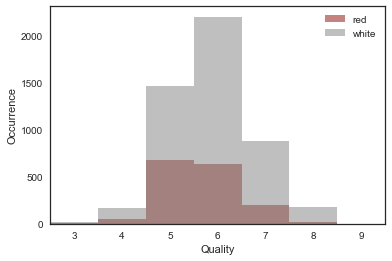

In [59]:
# seaborn styles
sns.set_context('notebook')
sns.set_style('white')
sns.set_palette('dark')

# custom colors
red = sns.color_palette()[2]
white = 'gray'

# set bins for histogram
bin_range = np.array([3, 4, 5, 6, 7, 8, 9])

# plot histogram of quality counts for red and white wines
ax = plt.axes()
for color, plot_color in zip(['red', 'white'], [red, white]):
    q_data = data.loc[data.color==color, 'quality']
    q_data.hist(bins=bin_range, 
                alpha=0.5, ax=ax, 
                color=plot_color, label=color)
    

ax.legend()
ax.set(xlabel='Quality', ylabel='Occurrence')

# force tick labels to be in middle of region
ax.set_xlim(3,10)
ax.set_xticks(bin_range+0.5)
ax.set_xticklabels(bin_range);
ax.grid('off')


## Exercício 2

* Vamos verificar a correlação e viés das variáveis (exceto para as variáveis alvo).
* Aplique a transformação ou escala apropriada.
* Examine a distribuição par a par das variáveis com pairplots para verificar escala e normalização.


In [60]:
float_columns = [x for x in data.columns if x not in ['color', 'quality']]

# Use o método que gera a matriz de correlação
corr_mat = data[float_columns].corr()

# Deixe os elementos da diagonal como 0.0
for x in range(len(float_columns)):
    corr_mat.iloc[x,x] = 0.0
    
corr_mat

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
fixed_acidity,0.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452
volatile_acidity,0.219008,0.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640
citric_acid,0.324436,-0.377981,0.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493
residual_sugar,-0.111981,-0.196011,0.142451,0.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415
chlorides,0.298195,0.377124,0.038998,-0.128940,0.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,0.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,0.000000,0.032395,-0.238413,-0.275727,-0.265740
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,0.000000,0.011686,0.259478,-0.686745
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,0.000000,0.192123,0.121248
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,0.000000,-0.003029


In [61]:
# Aplique o método da função absoluta e que retorna o id com máxima correlação
corr_mat.abs().max()

fixed_acidity           0.458910
volatile_acidity        0.414476
citric_acid             0.377981
residual_sugar          0.552517
chlorides               0.395593
free_sulfur_dioxide     0.720934
total_sulfur_dioxide    0.720934
density                 0.686745
pH                      0.329808
sulphates               0.395593
alcohol                 0.686745
dtype: float64

Vamos examinar o viés:

In [62]:
skew_columns = (data[float_columns]
                .skew()
                .sort_values(ascending=False))

skew_columns = skew_columns.loc[skew_columns > 0.75]
skew_columns

chlorides              5.399828
sulphates              1.797270
fixed_acidity          1.723290
volatile_acidity       1.495097
residual_sugar         1.435404
free_sulfur_dioxide    1.220066
dtype: float64

In [63]:
# Que função aplicamos nesse caso?
for col in skew_columns.index.tolist():
    data[col] = np.log(data[col])


Vamos escalonar os atributos:

In [64]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
data[float_columns] = sc.fit_transform(data[float_columns])

data.head(4)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,0.240369,1.876072,-2.192833,-0.791963,0.959347,-1.171275,-1.446359,1.034993,1.813090,0.338472,-0.915464,5,red
1,0.560894,2.397336,-2.192833,-0.428719,1.549041,0.003936,-0.862469,0.701486,-0.115073,1.093834,-0.580068,5,red
2,0.560894,2.063397,-1.917553,-0.570703,1.402498,-0.727296,-1.092486,0.768188,0.258120,0.918293,-0.580068,5,red
3,2.763674,-0.211092,1.661085,-0.791963,0.928625,-0.548129,-0.986324,1.101694,-0.363868,0.474994,-0.580068,6,red


Agora vamos verificar o pairplot dos atributos:

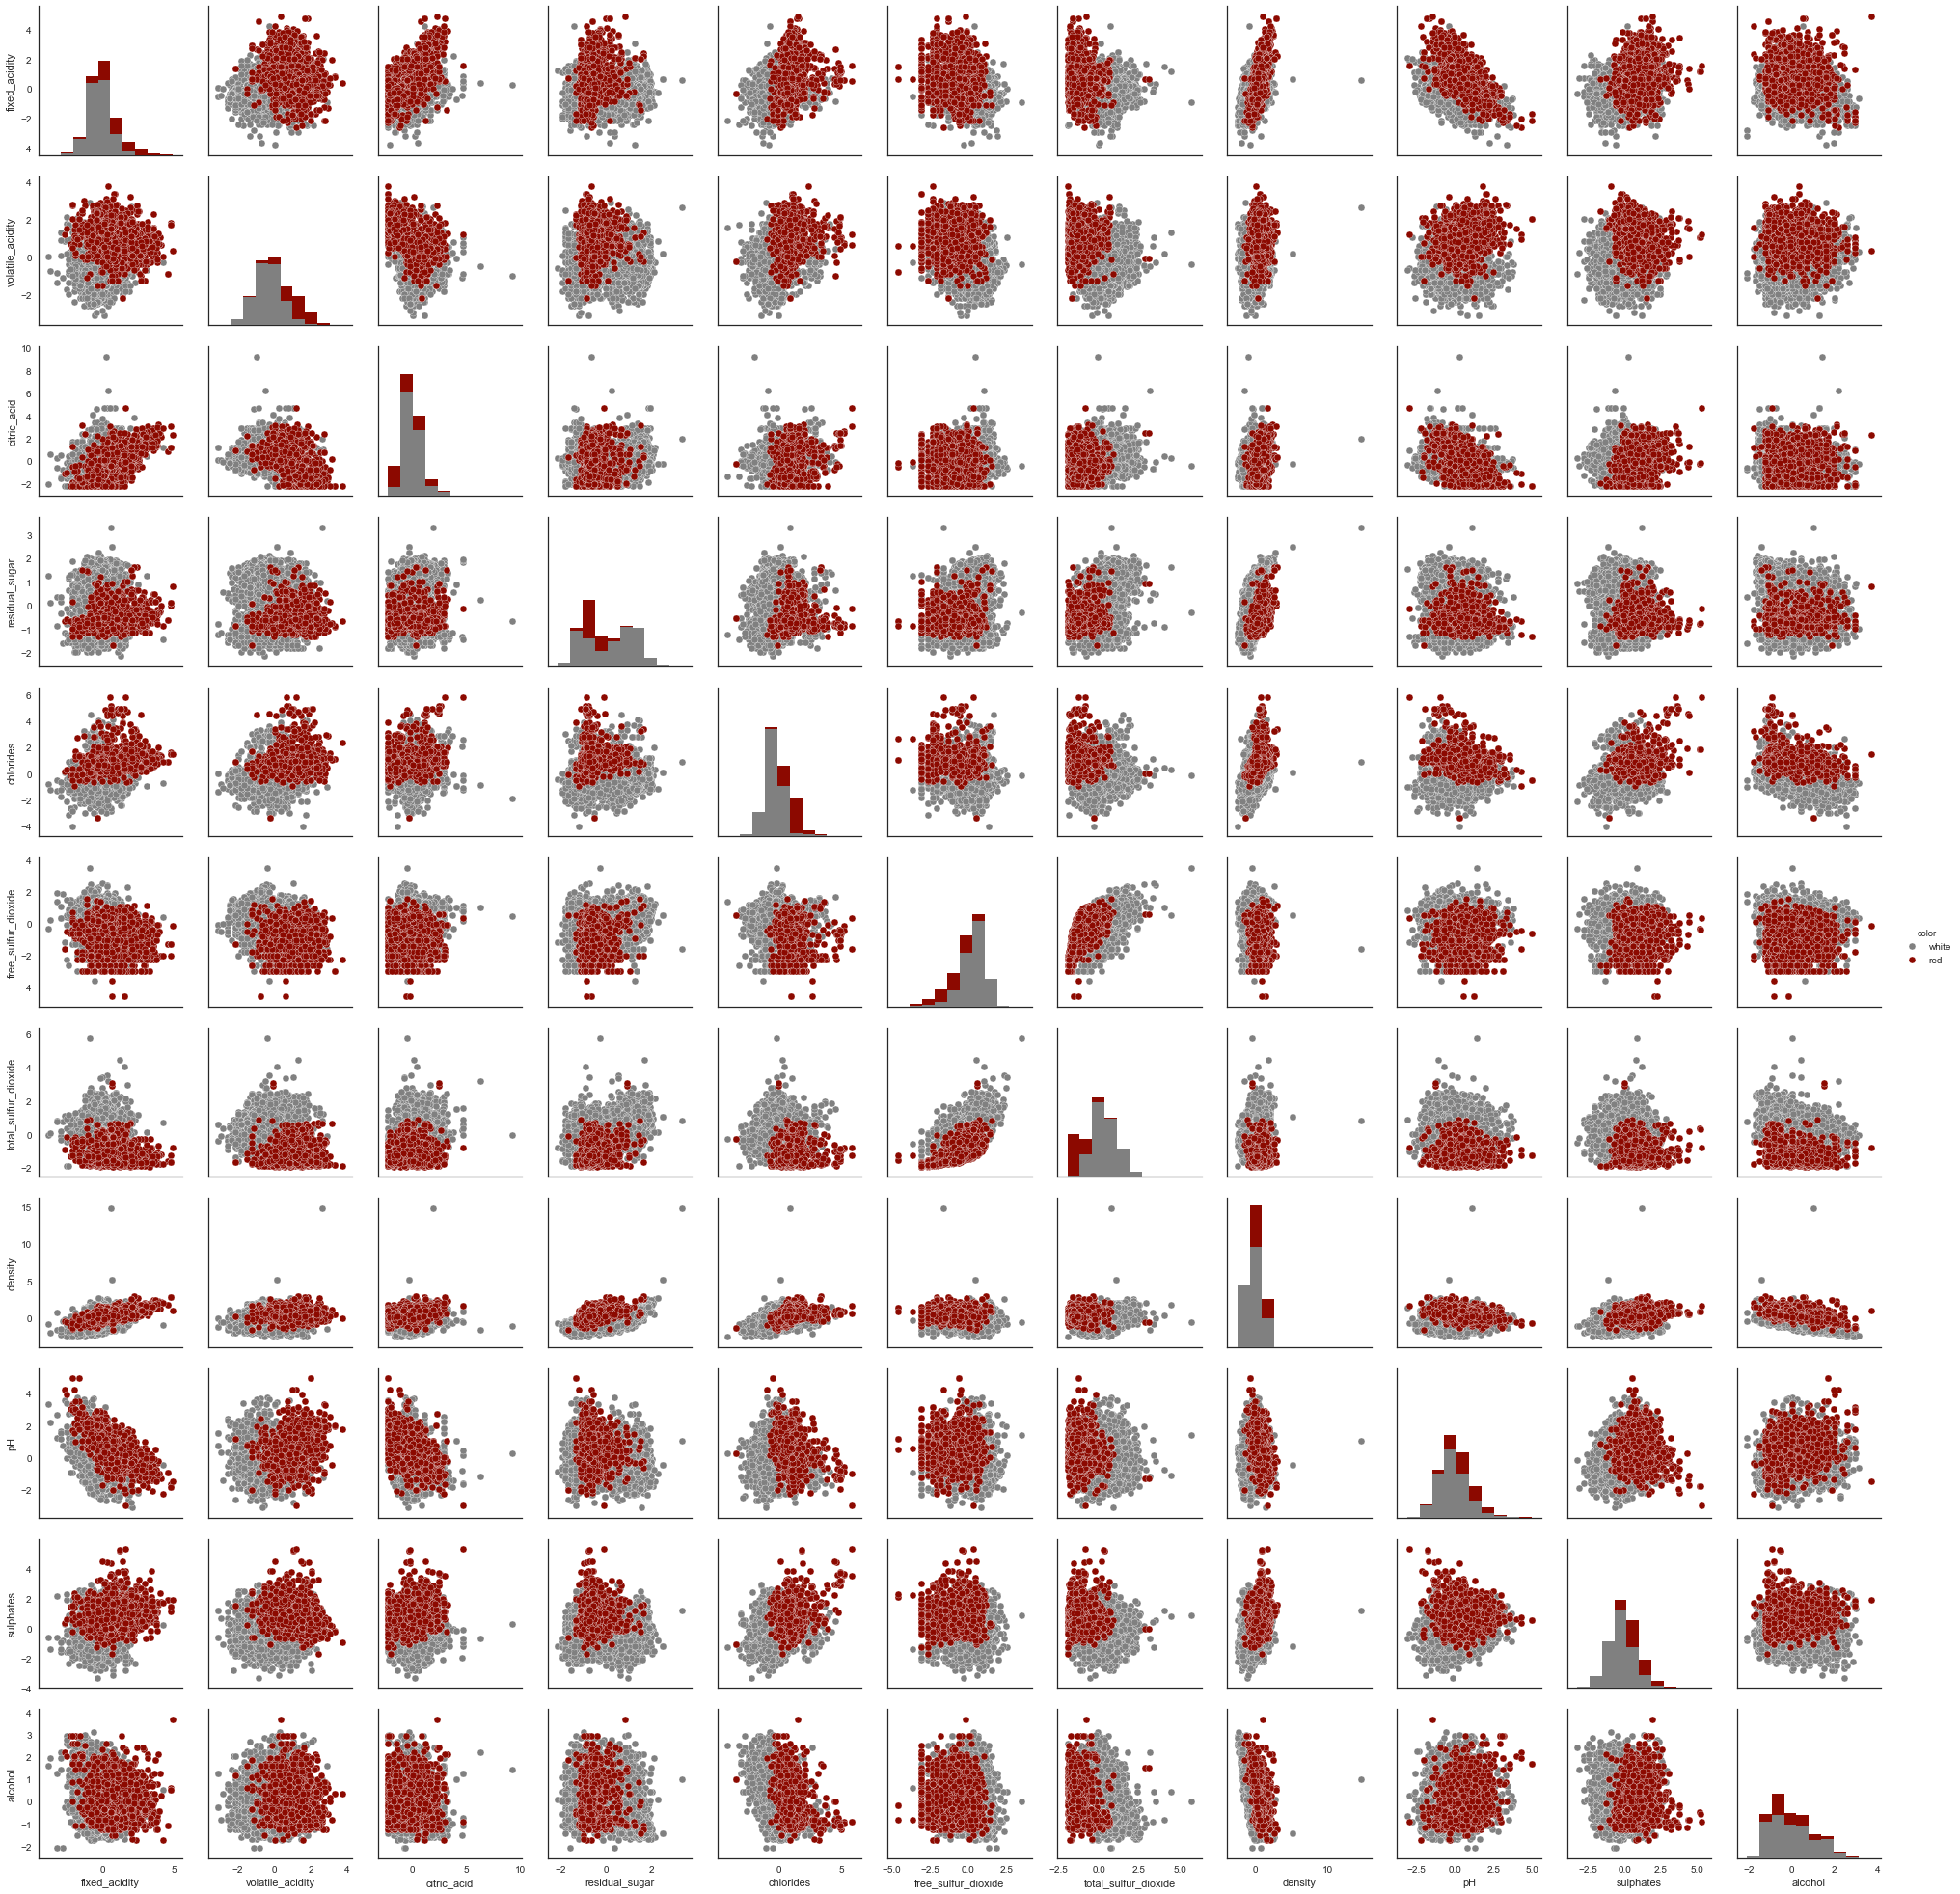

In [65]:
sns.set_context('notebook')
sns.pairplot(data[float_columns + ['color']], 
             hue='color', 
             hue_order=['white', 'red'],
             palette={'red':red, 'white':'gray'});

## Exercício 3

* Aplique o K-means com dois clusters.
* Examine os clusters pela cor do vinho.

In [66]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, random_state=42)
km = km.fit(data[float_columns] ,data['color'])

data['kmeans'] = km.predict(data[float_columns])

In [67]:
(data[['color','kmeans']]
 .groupby(['color','kmeans'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
color kmeans        
red   0         1579
      1           20
white 0          101
      1         4797

## Exercício 4

* Agora aplique o K-Means para valores de k de 1 a 20.
* Para cada modelo, armazene o número de clusters e o valor da inércia.
* Plote a relação e verifique qual o valor ideal de k.

A inércia é a soma das distâncias dos pontos aos centros, quanto menor esse valor, aparentemente melhor. Mas sempre será melhor?

In [68]:
# Create and fit a range of models
km_list = list()

for clust in range(1,21):
    km = KMeans(n_clusters=clust, random_state=42)
    km = km.fit(data[float_columns],data['color'])
    
    km_list.append(pd.Series({'clusters': clust, 
                              'inertia': km.inertia_,
                              'model': km}))

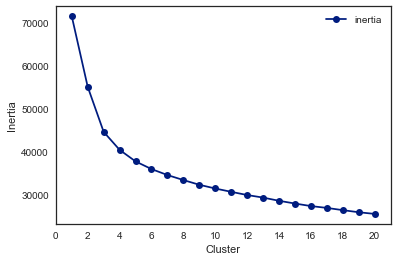

In [69]:
plot_data = (pd.concat(km_list, axis=1)
             .T
             [['clusters','inertia']]
             .set_index('clusters'))

ax = plot_data.plot(marker='o',ls='-')
ax.set_xticks(range(0,21,2))
ax.set_xlim(0,21)
ax.set(xlabel='Cluster', ylabel='Inertia');

## Exercício 5

* Vamos aplicar um agrupamento hierárquico com dois clusters.
* Compare os resultados obtidos pelo K-means com relação a cor de vinho.
* Iremos criar um dendrograma do agrupamento produzido utilizando o módulo [`cluster.hierarchy`](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html#module-scipy.cluster.hierarchy) da biblioteca  SciPy.

In [70]:
from sklearn.cluster import AgglomerativeClustering

ag = AgglomerativeClustering(n_clusters=2, linkage='ward', compute_full_tree=True)
ag = ag.fit(data[float_columns],data['color'])
data['agglom'] = ag.fit_predict(data[float_columns])

Note que a atribuição do índice de clusters é arbitrária, não necessariamente corresponde ao mesmo obtido pelo K-Means.

In [71]:
(data[['color','agglom','kmeans']]
 .groupby(['color','agglom','kmeans'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
color agglom kmeans        
red   0      0           11
             1           16
      1      0         1568
             1            4
white 0      0           58
             1         4752
      1      0           43
             1           45

Agora vamos plotar o dendrograma obtido.

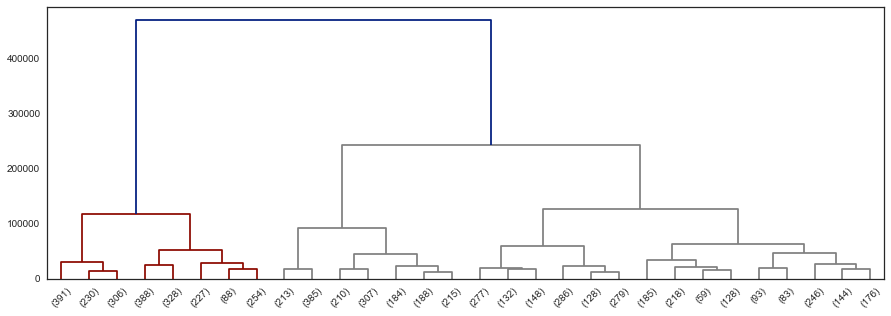

In [72]:
from scipy.cluster import hierarchy
from matplotlib import colors

Z = hierarchy.linkage(ag.children_, method='ward')

fig, ax = plt.subplots(figsize=(15,5))

# Some color customization
dark_palette = sns.color_palette()
red = colors.to_hex(dark_palette[2])
blue = colors.to_hex(dark_palette[0])

hierarchy.set_link_color_palette([red, 'gray'])

den = hierarchy.dendrogram(Z, orientation='top', 
                           p=30, truncate_mode='lastp',
                           show_leaf_counts=True, ax=ax,
                           above_threshold_color=blue)

## Exercício 6

Nesse exercício vamos explorar o uso de agrupamento de dados como uma criação de atributos.

* Crie um atributo **binário** chamado `y`, cujo valor é 0 se a qualidade do vinho for menor ou igual a 7 e 1 caso contrário.
* Crie uma variável chamada `X_with_kmeans` extraído de `data`, fazendo drop das colunas "quality", "color" e "agglom" da nossa base de dados. Crie `X_without_kmeans` fazendo drop também da coluna "kmeans".
* Para as duas bases, use `StratifiedShuffleSplit` com 10 splits, e aplique Regressão Logística medindo o roc-auc scores.
* Compare a média para a base com kmeans e sem kmeans.

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedShuffleSplit


y = list([1 if i > 7 else 0 for i in data['quality']])
y = pd.Series(y).reshape(1, -1)
X_with_kmeans = data.drop(['agglom', 'color', 'quality'], axis=1)
X_without_kmeans = X_with_kmeans.drop('kmeans', axis=1)
sss = StratifiedShuffleSplit(n_splits=10, random_state=6532)


def get_avg_roc_10splits(estimator, X, y):
    roc_auc_list = []
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        estimator.fit(X_train, y_train)        
        y_scored = estimator.predict_proba(y_test)[:, 1]
        roc_auc_list.append(roc_auc_score(y_test, y_scored))
    return np.mean(roc_auc_list)

estimator = LogisticRegression()
roc_with_kmeans = get_avg_roc_10splits(estimator, X_with_kmeans, y)
roc_without_kmeans = get_avg_roc_10splits(estimator, X_without_kmeans, y)
print("Sem kmeans - roc-auc = \"{0}\"".format(roc_without_kmeans))
print("Com kmeans - roc-auc = \"{0}\"".format(roc_with_kmeans))

E:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys


ValueError: Found input variables with inconsistent numbers of samples: [6497, 1]

Vamos verificar se o número de clusters afeta o desempenho do algoritmo:

* Vamos criar uma função `create_kmeans_columns` que cria uma base de dados com o atributo proveniente do kmeans aplicado com um certo k.
* Repetiremos o experimento anterior para k=1..20

In [52]:
from sklearn.linear_model import LogisticRegression

X_basis = data[float_columns]
sss = StratifiedShuffleSplit(n_splits=10, random_state=6532)


def create_kmeans_columns(k):
    km = KMeans(n_clusters=k)
    km.fit(X_basis)
    km_col = pd.Series(km.predict(X_basis))
    km_cols = pd.get_dummies(km_col, prefix='kmeans_cluster')
    return pd.concat([X_basis, km_cols], axis=1)


estimator = LogisticRegression()
ns = range(1, 21)
roc_auc_list = [get_avg_roc_10splits(estimator, create_kmeans_columns(n), y)
                for n in ns]


# seaborn styles
sns.set_context('notebook')
sns.set_style('white')
sns.set_palette('dark')

ax = plt.axes()
ax.plot(ns, roc_auc_list)
ax.set(
    xticklabels= ns,
    xlabel='number of clusters as features',
    ylabel='average roc-auc over 10 iterations',
    title='KMeans + LogisticRegression'
)
ax.grid(True)

AttributeError: 'list' object has no attribute 'iloc'